In [28]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import datasets

import torch
from torch.utils.data import DataLoader

import pandas as pd
import numpy as np
from tqdm import tqdm
import importlib
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import analysis

In [31]:
importlib.reload(analysis)

<module 'analysis' from '/scratch/myh2014/TelephoneGame/model/initial_sentences/21TokenSents/textfile/bert-base-uncased/10_2000/analysis.py'>

In [37]:
initials = []
initial_data = []
finals = []
final_data = []

model_names = ["facebook/opt-125m", "facebook/opt-350m", "facebook/opt-1.3b", "facebook/opt-6.7b"]

In [22]:
def get_likelihoods(init, final, num_words=21):
    return np.exp(-init/num_words), np.exp(-final/num_words)

def get_ranks(init, final):
    array = np.con
    order = array.argsort()
    ranks = order.argsort()

In [ ]:
for name in model_names:
    bat_avg_init, bat_avg_final = analysis.main(name, "final.csv")
    l_init, l_final = get_likelihoods(bat_avg_init, bat_avg_final)
    initials.append(np.mean(l_init))
    initial_data.append(l_init)
    finals.append(np.mean(l_final))
    final_data.append(l_final)

In [52]:
initials = np.array(initials)
initial_data = np.array(initial_data)
finals = np.array(finals)
final_data = np.array(final_data)

In [57]:
ttest_ind(initial_data, final_data, axis=1)

Ttest_indResult(statistic=array([ 7.93488002,  6.46011106,  9.77262108, 12.45750604]), pvalue=array([7.56977770e-15, 1.86995777e-10, 2.51668386e-21, 1.53502672e-32]))

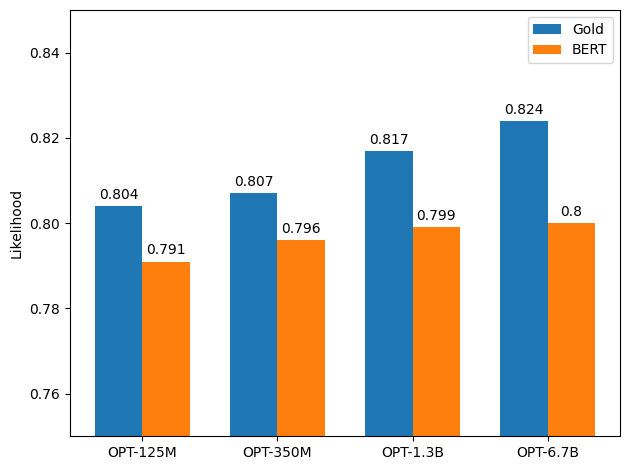

In [59]:
labels = ['OPT-125M', 'OPT-350M', 'OPT-1.3B', 'OPT-6.7B']
x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, np.round(initials, 3), width, label='Gold')
rects2 = ax.bar(x + width/2, np.round(finals, 3), width, label='BERT')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Likelihood')
ax.set_xticks(x, labels)
ax.set_ylim(0.75, 0.85)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [61]:
fig.savefig('OPT-variants.png')